## Importing packages & reading files

In [1]:
# Importing packages
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Designing float format
pd.options.display.float_format = "{:.4f}".format

In [3]:
# Reading files
train = pd.read_csv("data/train_2v.csv")
test = pd.read_csv("data/test_2v.csv")

In [4]:
# Combining the datasets
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True, sort=True)
print (train.shape, test.shape, data.shape)

(43400, 13) (18601, 12) (62001, 13)


In [5]:
data.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
0,Rural,3.0000,95.1200,18.0000,No,Male,0,0,30669,NaN,train,0.0000,children
1,Urban,58.0000,87.9600,39.2000,Yes,Male,0,1,30468,never smoked,train,0.0000,Private
2,Urban,8.0000,110.8900,17.6000,No,Female,0,0,16523,NaN,train,0.0000,Private
3,Rural,70.0000,69.0400,35.9000,Yes,Female,0,0,56543,formerly smoked,train,0.0000,Private
4,Rural,14.0000,161.2800,19.1000,No,Male,0,0,46136,NaN,train,0.0000,Never_worked


# EDA (Exploratory Data Analysis)

## Variable identification

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62001 entries, 0 to 62000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Residence_type     62001 non-null  object 
 1   age                62001 non-null  float64
 2   avg_glucose_level  62001 non-null  float64
 3   bmi                59948 non-null  float64
 4   ever_married       62001 non-null  object 
 5   gender             62001 non-null  object 
 6   heart_disease      62001 non-null  int64  
 7   hypertension       62001 non-null  int64  
 8   id                 62001 non-null  int64  
 9   smoking_status     42958 non-null  object 
 10  source             62001 non-null  object 
 11  stroke             43400 non-null  float64
 12  work_type          62001 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 6.1+ MB


In [7]:
# Categrocial variables
data_cat=data.select_dtypes(include='object')
data_cat.columns

Index(['Residence_type', 'ever_married', 'gender', 'smoking_status', 'source',
       'work_type'],
      dtype='object')

In [8]:
data_cat.head()

,Residence_type,ever_married,gender,smoking_status,source,work_type
0,Rural,No,Male,NaN,train,children
1,Urban,Yes,Male,never smoked,train,Private
2,Urban,No,Female,NaN,train,Private
3,Rural,Yes,Female,formerly smoked,train,Private
4,Rural,No,Male,NaN,train,Never_worked


In [9]:
# Numeric variables
data_num=data.select_dtypes(exclude='object')
data_num.columns

Index(['age', 'avg_glucose_level', 'bmi', 'heart_disease', 'hypertension',
       'id', 'stroke'],
      dtype='object')

In [10]:
data_num.describe()

,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke
count,62001.0000,62001.0000,59948.0000,62001.0000,62001.0000,62001.0000,43400.0000
mean,42.1695,104.4538,28.5871,0.0477,0.0935,36452.5148,0.0180
std,22.5221,42.9605,7.7661,0.2131,0.2911,21067.1559,0.1331
min,0.0800,55.0000,10.1000,0.0000,0.0000,1.0000,0.0000
25%,24.0000,77.5400,23.2000,0.0000,0.0000,18187.0000,0.0000
50%,44.0000,91.6600,27.7000,0.0000,0.0000,36463.0000,0.0000
75%,60.0000,112.1200,32.8000,0.0000,0.0000,54693.0000,0.0000
max,82.0000,291.0500,97.6000,1.0000,1.0000,72943.0000,1.0000


The variable id is numeric.
It can be used as the index of the data frame.

## Handling duplicate values

In [11]:
#data.isna().sum()
data.apply(lambda x : sum(x.isnull()))

Residence_type           0
age                      0
avg_glucose_level        0
bmi                   2053
ever_married             0
gender                   0
heart_disease            0
hypertension             0
id                       0
smoking_status       19043
source                   0
stroke               18601
work_type                0
dtype: int64

In [12]:
data.apply(lambda x : len(x.unique()))

Residence_type           2
age                    104
avg_glucose_level    14143
bmi                    583
ever_married             2
gender                   3
heart_disease            2
hypertension             2
id                   62001
smoking_status           4
source                   2
stroke                   3
work_type                5
dtype: int64

In [13]:
# Checking duplicates
data.duplicated(subset=['id']).sum()

0

No duplicate values

In [14]:
# Setting variable id as index and sorting index ascendingly
data.set_index('id', inplace=True)
data.sort_index(ascending=True, inplace=True)

In [15]:
data.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,smoking_status,source,stroke,work_type
id,,,,,,,,,,,,
1,Urban,80.0000,67.4500,25.6000,Yes,Female,1,0,never smoked,train,0.0000,Self-employed
2,Urban,55.0000,105.1100,27.8000,Yes,Female,0,0,NaN,test,nan,Private
3,Urban,27.0000,84.9100,nan,Yes,Male,0,0,never smoked,test,nan,Private
4,Rural,37.0000,82.1500,24.3000,Yes,Female,0,0,smokes,train,0.0000,Private
5,Rural,78.0000,99.2600,22.6000,Yes,Male,1,1,smokes,test,nan,Self-employed


## Statistical summary

In [16]:
data.describe(include='all')

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,smoking_status,source,stroke,work_type
count,62001,62001.0000,62001.0000,59948.0000,62001,62001,62001.0000,62001.0000,42958,62001,43400.0000,62001
unique,2,nan,nan,nan,2,3,nan,nan,3,2,nan,5
top,Urban,nan,nan,nan,Yes,Female,nan,nan,never smoked,train,nan,Private
freq,31066,nan,nan,nan,39877,36622,nan,nan,22886,43400,nan,35584
mean,NaN,42.1695,104.4538,28.5871,NaN,NaN,0.0477,0.0935,NaN,NaN,0.0180,NaN
std,NaN,22.5221,42.9605,7.7661,NaN,NaN,0.2131,0.2911,NaN,NaN,0.1331,NaN
min,NaN,0.0800,55.0000,10.1000,NaN,NaN,0.0000,0.0000,NaN,NaN,0.0000,NaN
25%,NaN,24.0000,77.5400,23.2000,NaN,NaN,0.0000,0.0000,NaN,NaN,0.0000,NaN
50%,NaN,44.0000,91.6600,27.7000,NaN,NaN,0.0000,0.0000,NaN,NaN,0.0000,NaN
75%,NaN,60.0000,112.1200,32.8000,NaN,NaN,0.0000,0.0000,NaN,NaN,0.0000,NaN


In [17]:
# Getting summary of numeric variables
data.describe()

,age,avg_glucose_level,bmi,heart_disease,hypertension,stroke
count,62001.0000,62001.0000,59948.0000,62001.0000,62001.0000,43400.0000
mean,42.1695,104.4538,28.5871,0.0477,0.0935,0.0180
std,22.5221,42.9605,7.7661,0.2131,0.2911,0.1331
min,0.0800,55.0000,10.1000,0.0000,0.0000,0.0000
25%,24.0000,77.5400,23.2000,0.0000,0.0000,0.0000
50%,44.0000,91.6600,27.7000,0.0000,0.0000,0.0000
75%,60.0000,112.1200,32.8000,0.0000,0.0000,0.0000
max,82.0000,291.0500,97.6000,1.0000,1.0000,1.0000


In [18]:
# Getting summary of categorical variables
data.astype('object').describe().transpose() #transpose()=T

,count,unique,top,freq
Residence_type,62001,2,Urban,31066
age,62001.0000,104.0000,51.0000,1021.0000
avg_glucose_level,62001.0000,14143.0000,82.7900,24.0000
bmi,59948.0000,582.0000,27.6000,375.0000
ever_married,62001,2,Yes,39877
gender,62001,3,Female,36622
heart_disease,62001,2,0,59045
hypertension,62001,2,0,56207
smoking_status,42958,3,never smoked,22886
source,62001,2,train,43400


In [19]:
# Filtering categorical variables
data_cat = data.select_dtypes(include='object')
categorical_columns_a = data_cat.columns
# Including few numeric variables
categorical_columns_b = ['heart_disease','hypertension','stroke']
# Combining categorical_columns a and b
categorical_columns = list(categorical_columns_a) + categorical_columns_b
# Printing frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts() )



Frequency of Categories for varible Residence_type
Urban    31066
Rural    30935
Name: Residence_type, dtype: int64

Frequency of Categories for varible ever_married
Yes    39877
No     22124
Name: ever_married, dtype: int64

Frequency of Categories for varible gender
Female    36622
Male      25366
Other        13
Name: gender, dtype: int64

Frequency of Categories for varible smoking_status
never smoked       22886
formerly smoked    10753
smokes              9319
Name: smoking_status, dtype: int64

Frequency of Categories for varible source
train    43400
test     18601
Name: source, dtype: int64

Frequency of Categories for varible work_type
Private          35584
Self-employed     9654
children          8769
Govt_job          7742
Never_worked       252
Name: work_type, dtype: int64

Frequency of Categories for varible heart_disease
0    59045
1     2956
Name: heart_disease, dtype: int64

Frequency of Categories for varible hypertension
0    56207
1     5794
Name: hypertension, d

In [20]:
# Designing plot styles
plt.style.use('ggplot')
plt.style.use('tableau-colorblind10')

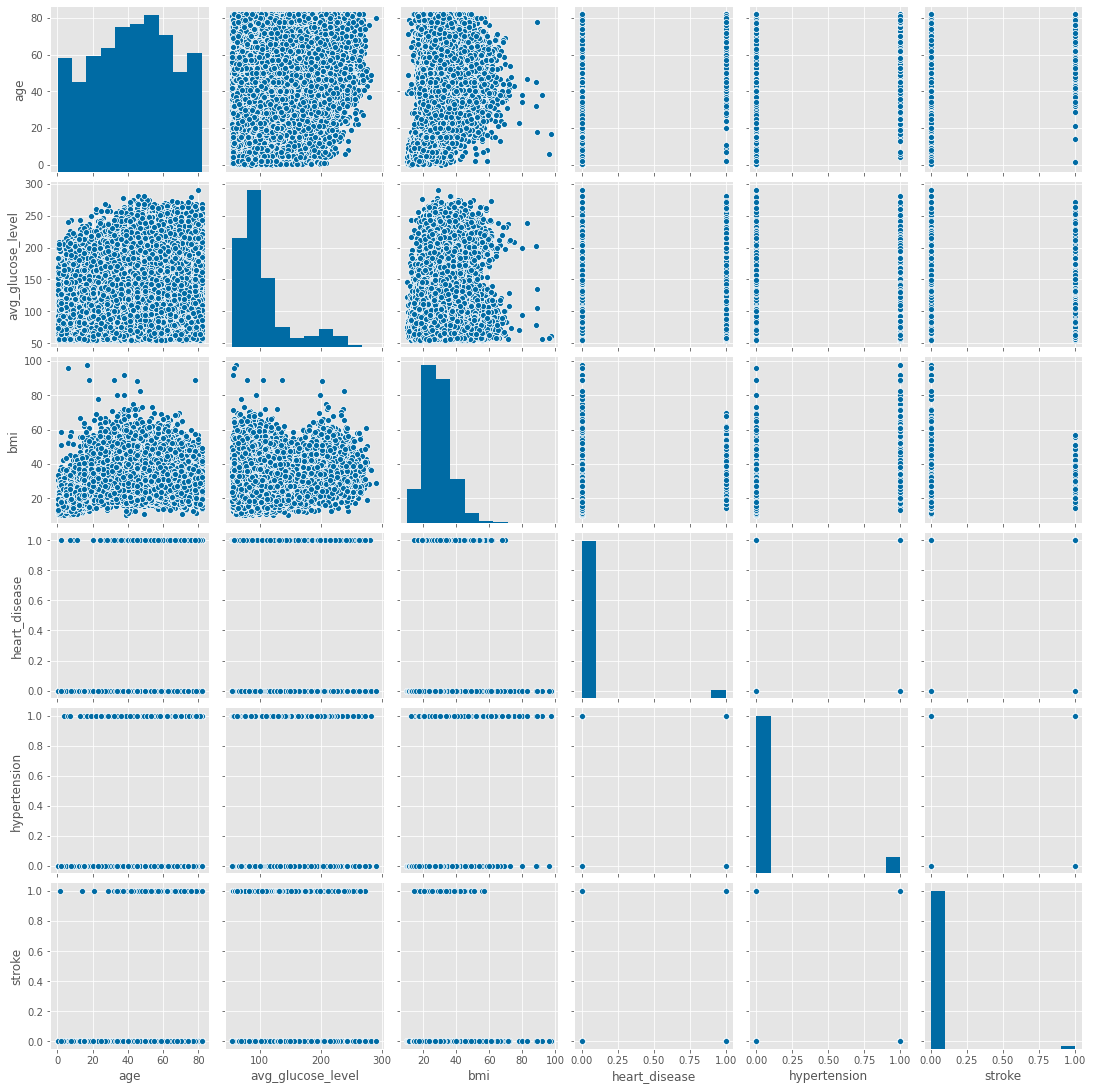

In [21]:
sns.pairplot(data)

## Univariate analysis - categorical variables

In [22]:
categorical_columns

['Residence_type',
 'ever_married',
 'gender',
 'smoking_status',
 'source',
 'work_type',
 'heart_disease',
 'hypertension',
 'stroke']

### Stroke (target)

In [23]:
data['stroke'].value_counts()

0.0000    42617
1.0000      783
Name: stroke, dtype: int64

In [24]:
data['stroke_cat'] = np.NaN
data['stroke_cat'][data['stroke']==1] = 'Yes'
data['stroke_cat'][data['stroke']==0] = 'No'

In [25]:
data['stroke_cat'].value_counts()

No     42617
Yes      783
Name: stroke_cat, dtype: int64

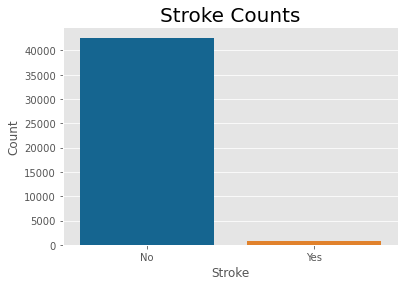

In [26]:
# Countplot

sns.countplot(data['stroke_cat'])
plt.title("Stroke Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

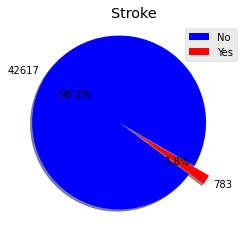

In [27]:
# Pie chart

stroke_cat = data['stroke_cat'].value_counts()
values = stroke_cat.values
#values = [stroke_cat[0],stroke_cat[1]]
colors = ['b', 'red']
labels = stroke_cat.index
#labels = ['No','Yes']
explode = (0.2, 0)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=330, counterclock=True, shadow=True)
plt.title('Stroke')
plt.legend(labels, loc='best')

plt.show()

### Residence_type

In [28]:
data['Residence_type'].value_counts()

Urban    31066
Rural    30935
Name: Residence_type, dtype: int64

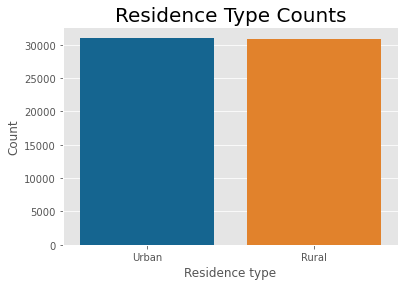

In [29]:
# Countplot

sns.countplot(data['Residence_type'])
plt.title("Residence Type Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Residence type')
plt.ylabel('Count')
plt.show()

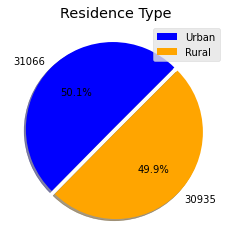

In [30]:
# Pie chart

stroke_cat = data['Residence_type'].value_counts()
values = stroke_cat.values
colors = ['b', 'orange']
labels = stroke_cat.index
explode = (0.05, 0)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=45, counterclock=True, shadow=True)
plt.title('Residence Type')
plt.legend(labels, loc='best')

plt.show()

### Ever_married

In [31]:
data['ever_married'].value_counts()

Yes    39877
No     22124
Name: ever_married, dtype: int64

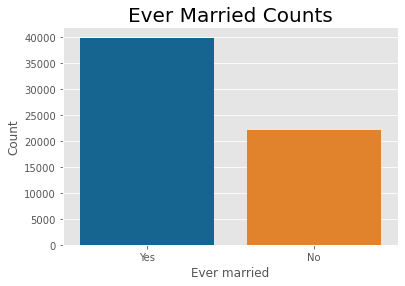

In [32]:
# Countplot

sns.countplot(data['ever_married'])
plt.title("Ever Married Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Ever married')
plt.ylabel('Count')
plt.show()

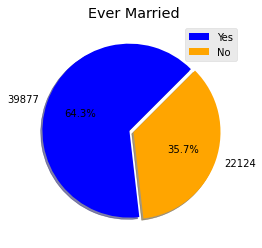

In [33]:
# Pie chart

stroke_cat = data['ever_married'].value_counts()
values = stroke_cat.values
colors = ['b', 'orange']
labels = stroke_cat.index
explode = (0.05, 0)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=45, counterclock=True, shadow=True)
plt.title('Ever Married')
plt.legend(labels, loc='best')

plt.show()

### Gender

In [34]:
data['gender'].value_counts()

Female    36622
Male      25366
Other        13
Name: gender, dtype: int64

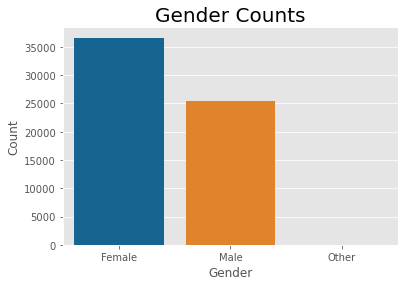

In [35]:
# Countplot

sns.countplot(data['gender'])
plt.title("Gender Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

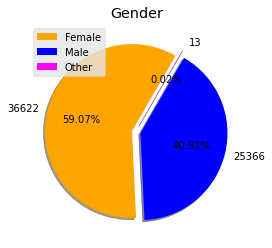

In [36]:
# Pie chart

stroke_cat = data['gender'].value_counts()
values = stroke_cat.values
colors = ['orange', 'b', 'magenta']
labels = stroke_cat.index
explode = (0.05, 0.05, 0.1)
plt.pie(values, colors=colors, labels= values, autopct='%1.2f%%', explode=explode,
        startangle=60, counterclock=True, shadow=True)
plt.title('Gender')
plt.legend(labels, loc='best')

plt.show()

### Work_type

In [37]:
data['work_type'].value_counts()

Private          35584
Self-employed     9654
children          8769
Govt_job          7742
Never_worked       252
Name: work_type, dtype: int64

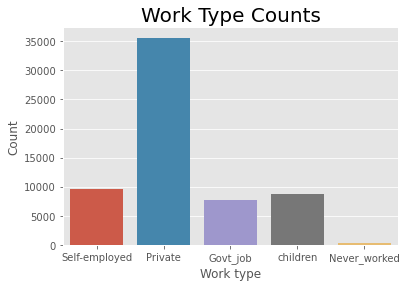

In [38]:
# Countplot

plt.style.use('ggplot')
sns.countplot(data['work_type'])
plt.title("Work Type Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Work type')
plt.ylabel('Count')
plt.show()
plt.style.use('tableau-colorblind10')

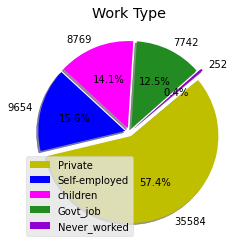

In [39]:
# Pie chart

stroke_cat = data['work_type'].value_counts()
values = stroke_cat.values
colors = ['y', 'b', 'magenta', 'Forestgreen', 'Darkviolet']
labels = stroke_cat.index
explode = (0.05, 0.05, 0.05, 0.05, 0.1)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=40, counterclock=False, shadow=True)
plt.title('Work Type')
plt.legend(labels, loc=3)

plt.show()

### Heart_disease

In [40]:
data['heart_disease'].value_counts()

0    59045
1     2956
Name: heart_disease, dtype: int64

In [41]:
data['heart_disease_cat'] = np.NaN
data['heart_disease_cat'][data['heart_disease']==1] = 'Yes'
data['heart_disease_cat'][data['heart_disease']==0] = 'No'

In [42]:
data['heart_disease_cat'].value_counts()

No     59045
Yes     2956
Name: heart_disease_cat, dtype: int64

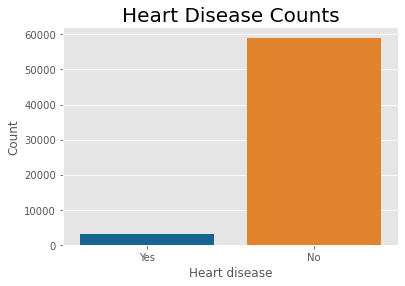

In [43]:
# Countplot

sns.countplot(data['heart_disease_cat'])
plt.title("Heart Disease Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.show()

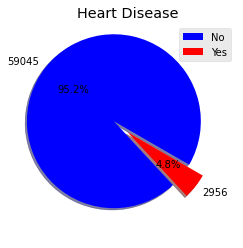

In [44]:
# Pie chart

stroke_cat = data['heart_disease_cat'].value_counts()
values = stroke_cat.values
colors = ['b', 'red']
labels = stroke_cat.index
explode = (0.2, 0)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=330, counterclock=True, shadow=True)
plt.title('Heart Disease')
plt.legend(labels, loc='best')

plt.show()

### Hypertension

In [45]:
data['hypertension'].value_counts()

0    56207
1     5794
Name: hypertension, dtype: int64

In [46]:
data['hypertension_cat'] = np.NaN
data['hypertension_cat'][data['hypertension']==1] = 'Yes'
data['hypertension_cat'][data['hypertension']==0] = 'No'

In [47]:
data['hypertension_cat'].value_counts()

No     56207
Yes     5794
Name: hypertension_cat, dtype: int64

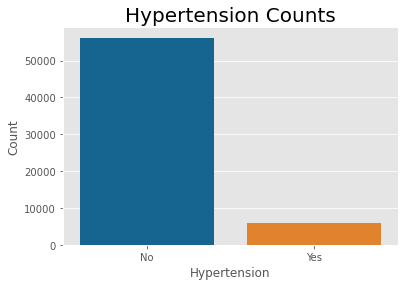

In [48]:
# Countplot

sns.countplot(data['hypertension_cat'])
plt.title("Hypertension Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

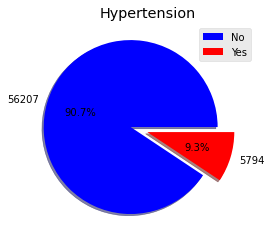

In [49]:
# Pie chart

stroke_cat = data['hypertension_cat'].value_counts()
values = stroke_cat.values
colors = ['b', 'red']
labels = stroke_cat.index
explode = (0.2, 0)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=0, counterclock=True, shadow=True)
plt.title('Hypertension')
plt.legend(labels, loc='best')

plt.show()

## Univariate analysis - numeric variables

In [50]:
data_num.columns

Index(['age', 'avg_glucose_level', 'bmi', 'heart_disease', 'hypertension',
       'id', 'stroke'],
      dtype='object')

### Age

In [51]:
data['age'].describe()

count   62001.0000
mean       42.1695
std        22.5221
min         0.0800
25%        24.0000
50%        44.0000
75%        60.0000
max        82.0000
Name: age, dtype: float64

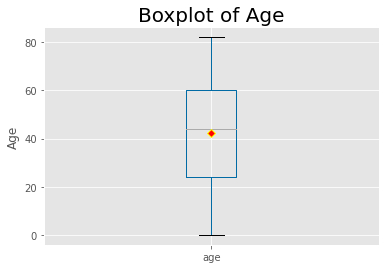

In [52]:
data.boxplot(column=['age'], showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot of Age", y=1, fontdict={"fontsize": 20})
plt.xlabel('')
plt.ylabel('Age')
plt.show()

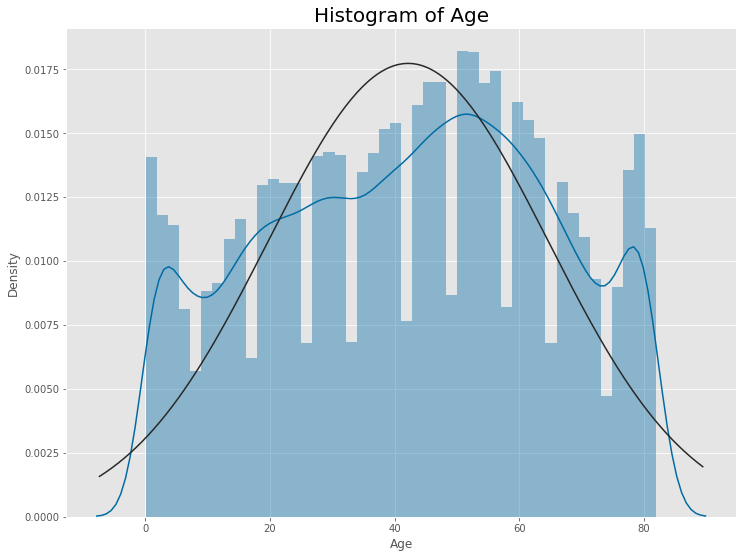

In [53]:
# Histogram
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data['age'], fit= norm)
plt.title("Histogram of Age", y=1, fontdict={"fontsize": 20})
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [54]:
# Skewness and kurtosis
print("Skewness: %f" % data['age'].skew())
print("Kurtosis: %f" % data['age'].kurt())

Skewness: -0.099093
Kurtosis: -1.003695


### Avg_glucose_level

In [55]:
data['avg_glucose_level'].describe()

count   62001.0000
mean      104.4538
std        42.9605
min        55.0000
25%        77.5400
50%        91.6600
75%       112.1200
max       291.0500
Name: avg_glucose_level, dtype: float64

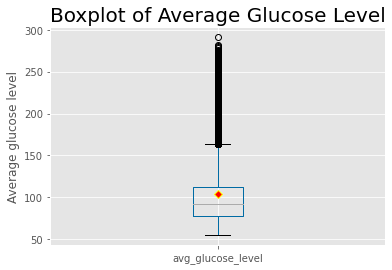

In [56]:
data.boxplot(column=['avg_glucose_level'], showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot of Average Glucose Level", y=1, fontdict={"fontsize": 20})
plt.xlabel('')
plt.ylabel('Average glucose level')
plt.show()

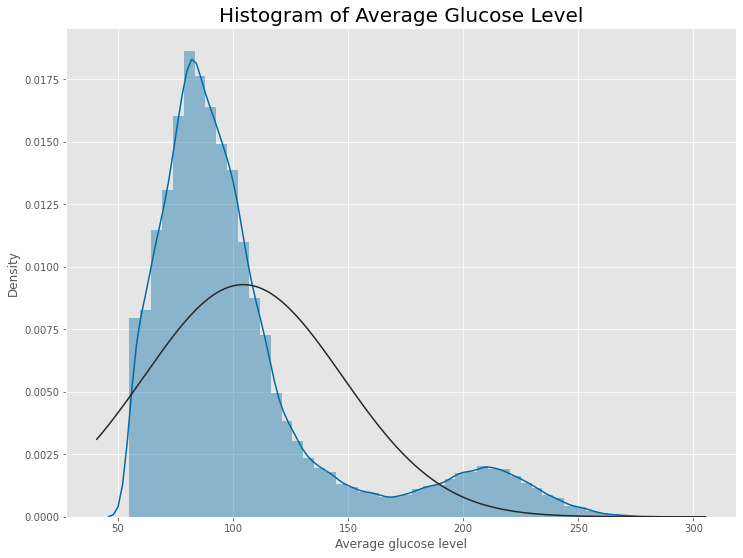

In [57]:
# Histogram
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data['avg_glucose_level'], fit= norm)
plt.title("Histogram of Average Glucose Level", y=1, fontdict={"fontsize": 20})
plt.xlabel('Average glucose level')
plt.ylabel('Density')
plt.show()

In [58]:
# Skewness and kurtosis
print("Skewness: %f" % data['avg_glucose_level'].skew())
print("Kurtosis: %f" % data['avg_glucose_level'].kurt())

Skewness: 1.677667
Kurtosis: 2.204007


In [59]:
data['avg_glucose_level_log'] = np.log(data['avg_glucose_level'])

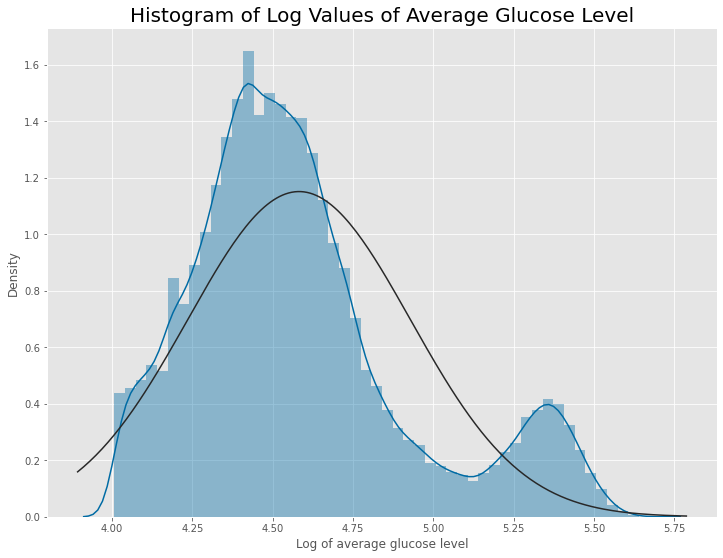

In [60]:
# Histogram
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data['avg_glucose_level_log'], fit= norm)
plt.title("Histogram of Log Values of Average Glucose Level", y=1, fontdict={"fontsize": 20})
plt.xlabel('Log of average glucose level')
plt.ylabel('Density')
plt.show()

In [61]:
# Skewness and kurtosis
print("Skewness: %f" % data['avg_glucose_level_log'].skew())
print("Kurtosis: %f" % data['avg_glucose_level_log'].kurt())

Skewness: 0.930149
Kurtosis: 0.396316


### BMI

In [62]:
data['bmi'].describe()

count   59948.0000
mean       28.5871
std         7.7661
min        10.1000
25%        23.2000
50%        27.7000
75%        32.8000
max        97.6000
Name: bmi, dtype: float64

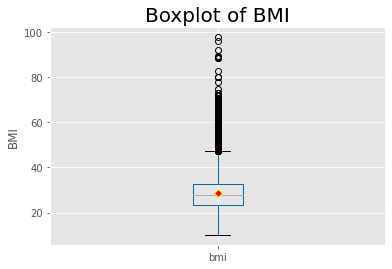

In [63]:
data.boxplot(column=['bmi'], showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot of BMI", y=1, fontdict={"fontsize": 20})
plt.xlabel('')
plt.ylabel('BMI')
plt.show()

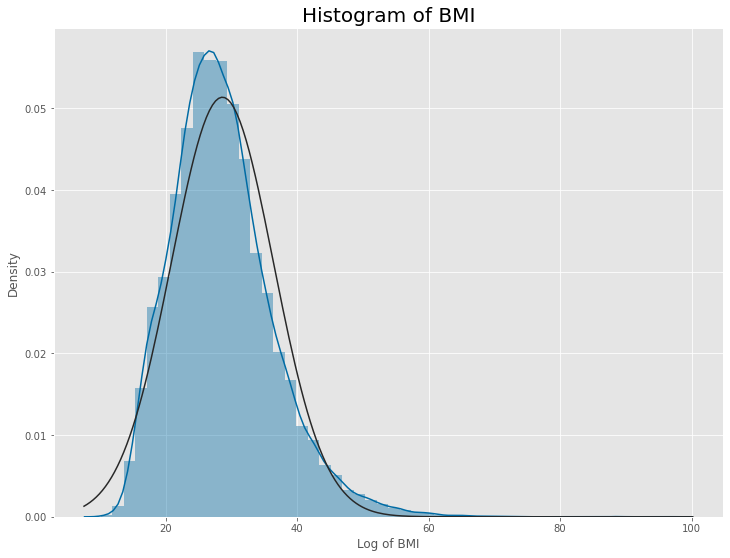

In [64]:
# Histogram
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(data['bmi'], fit= norm)
plt.title("Histogram of BMI", y=1, fontdict={"fontsize": 20})
plt.xlabel('Log of BMI')
plt.ylabel('Density')
plt.show()

In [65]:
# Skewness and kurtosis
print("Skewness: %f" % data['bmi'].skew())
print("Kurtosis: %f" % data['bmi'].kurt())

Skewness: 0.889277
Kurtosis: 1.884421


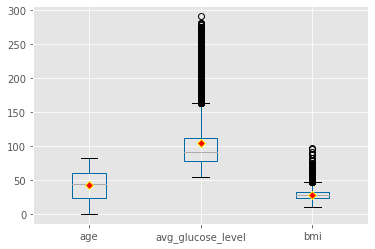

In [66]:
# Comparing within one chart
data.boxplot(column=['age','avg_glucose_level','bmi'], showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})

## Bivariate analysis
### Categorcal vs categorical (Chi-square test)

In [67]:
data.columns

Index(['Residence_type', 'age', 'avg_glucose_level', 'bmi', 'ever_married',
       'gender', 'heart_disease', 'hypertension', 'smoking_status', 'source',
       'stroke', 'work_type', 'stroke_cat', 'heart_disease_cat',
       'hypertension_cat', 'avg_glucose_level_log'],
      dtype='object')

### Stroke vs hypertension

In [68]:
pd.crosstab(data['hypertension_cat'],data['stroke_cat'],margins = True)

stroke_cat,No,Yes,All
hypertension_cat,,,
No,38756,583,39339
Yes,3861,200,4061
All,42617,783,43400


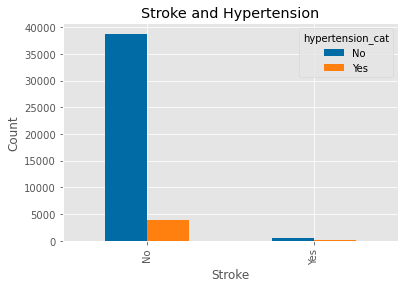

In [69]:
pd.crosstab(data['stroke_cat'],data['hypertension_cat']).plot(kind='bar')
plt.title('Stroke and Hypertension')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [70]:
# Chi-square test
from scipy.stats import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data['stroke_cat'],data['hypertension_cat'],margins = False))

print(exp_val)
print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

if p_val < 0.05: # Considering significant level 5%
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

[[38629.26642857  3987.73357143]
 [  709.73357143    73.26642857]]

Chi-square is : 244.353175 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


### Stroke vs heart_disease

In [71]:
pd.crosstab(data['heart_disease_cat'],data['stroke_cat'],margins = True)

stroke_cat,No,Yes,All
heart_disease_cat,,,
No,40732,606,41338
Yes,1885,177,2062
All,42617,783,43400


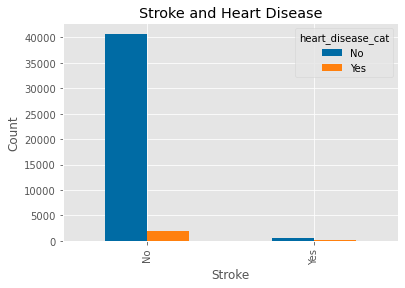

In [72]:
pd.crosstab(data['stroke_cat'],data['heart_disease_cat']).plot(kind='bar')
plt.title('Stroke and Heart Disease')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [73]:
# Chi-square test
from scipy.stats import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data['stroke_cat'],data['heart_disease_cat'],margins = False))

print(exp_val)
print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

if p_val < 0.05: # Considering significant level 5%
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

[[4.05922015e+04 2.02479848e+03]
 [7.45798479e+02 3.72015207e+01]]

Chi-square is : 557.672438 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


### Hypertension vs heart_disease

In [74]:
pd.crosstab(data['hypertension_cat'],data['heart_disease_cat'],margins = True)

heart_disease_cat,No,Yes,All
hypertension_cat,,,
No,54005,2202,56207
Yes,5040,754,5794
All,59045,2956,62001


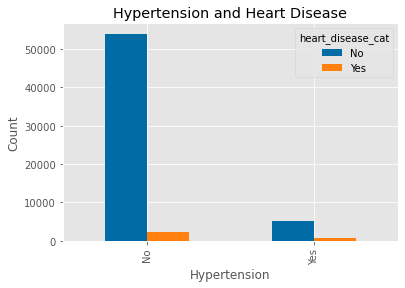

In [75]:
pd.crosstab(data['hypertension_cat'],data['heart_disease_cat']).plot(kind='bar')
plt.title('Hypertension and Heart Disease')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

In [76]:
# Chi-square test
from scipy.stats import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data['hypertension_cat'],data['heart_disease_cat'],margins = False))

print(exp_val)
print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

if p_val < 0.05: # Considering significant level 5%
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

[[53527.23851228  2679.76148772]
 [ 5517.76148772   276.23851228]]

Chi-square is : 955.107841 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


## Bivariate analysis
### Categorcal vs numeric (T-test or ANOVA test)

### Stroke vs age

In [77]:
import researchpy as rp
rp.summary_cont(data['age'].groupby(data['stroke_cat']))

,N,Mean,SD,SE,95% Conf.,Interval
stroke_cat,,,,,,
No,42617,41.7416,22.3851,0.1084,41.5290,41.9541
Yes,783,68.1434,12.3165,0.4402,67.2794,69.0075


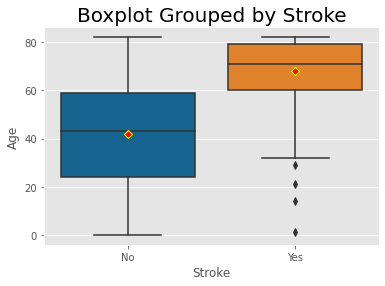

In [78]:
# Boxplot
#plt.style.use('ggplot')
ax = sns.boxplot(x='stroke_cat', y='age', data=data, showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot Grouped by Stroke", y=1, fontdict={"fontsize": 20})
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()
#plt.style.use('tableau-colorblind10')

#### T-test

In [79]:
Good=data[(data['stroke']==0)]
Bad=data[(data['stroke']==1)]
Good.shape, Bad.shape

((42617, 16), (783, 16))

Text(0, 0.5, 'Density')

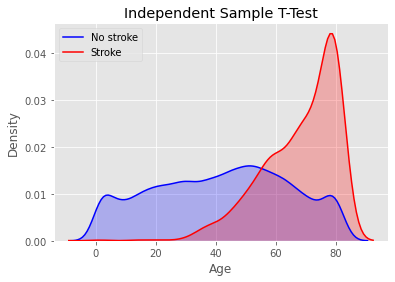

In [80]:
sns.kdeplot(Good['age'], shade=True,color='blue',label='No stroke')
sns.kdeplot(Bad['age'], shade=True,color='red',label='Stroke')
plt.title("Independent Sample T-Test")
plt.xlabel('Age')
plt.ylabel('Density')

Null Hypothesis: µGood = µBad (the means of both populations are equal)
Alternate Hypothesis: µGood ≠ µBad (the means of both populations are not equal)

In [81]:
Good=Good.drop(Good[Good['age'].isnull()].index)
Bad=Bad.drop(Bad[Bad['age'].isnull()].index)
a=Good['age']
b=Bad['age']

In [82]:
from scipy import stats
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) # running independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) # printing the P-Value and the T-Statistic

P-Value:4.121227784527441e-304 T-Statistic:-58.241544133668725


Therefore, we can reject the null hypothesis in support of the alternative.

Before the results are interpreted, the assumptions of the test should be checked.

Three assumptions to be met:

Assumption 1: Two samples are independent;
Assumption 2: The data from each of the two groups follows a normal distribution (Rely on the Central Limit Theorem if the sample size n>30);
Assumption 3: The two samples have the same variances (Homogeneity of Variance).

In [83]:
# Barlett test (sensitive to departures from normality) and Levene's test (less sensitive) for equality of variances
stats.levene(a, b)

LeveneResult(statistic=452.7852827147569, pvalue=5.802087755032389e-100)

### Stroke vs avg_glucose_level

In [84]:
#import researchpy as rp
rp.summary_cont(data['avg_glucose_level'].groupby(data['stroke_cat']))

,N,Mean,SD,SE,95% Conf.,Interval
stroke_cat,,,,,,
No,42617,104.0216,42.6088,0.2064,103.6170,104.4261
Yes,783,129.5827,59.7341,2.1347,125.3922,133.7731


Text(0, 0.5, 'Average glucose level')

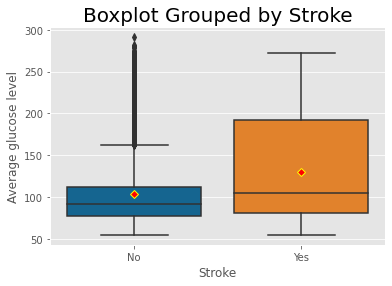

In [85]:
# Method 2
ax = sns.boxplot(x='stroke_cat', y='avg_glucose_level', data=data, showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot Grouped by Stroke", y=1, fontdict={"fontsize": 20})
plt.xlabel('Stroke')
plt.ylabel('Average glucose level')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000010F163A66A0>,
      dtype=object)

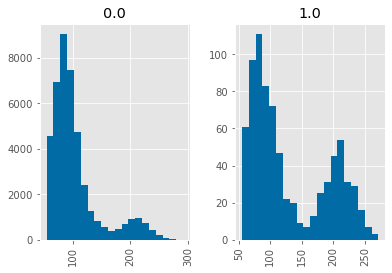

In [86]:
data.hist(column='avg_glucose_level', by='stroke', bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000010F16484910>,
      dtype=object)

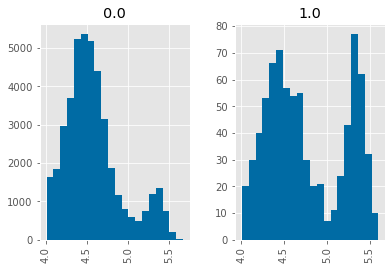

In [87]:
data.hist(column='avg_glucose_level_log', by='stroke', bins=20)

#### T-test

In [88]:
Good=data[(data['stroke']==0)]
Bad=data[(data['stroke']==1)]
Good.shape, Bad.shape

((42617, 16), (783, 16))

Text(0, 0.5, 'Density')

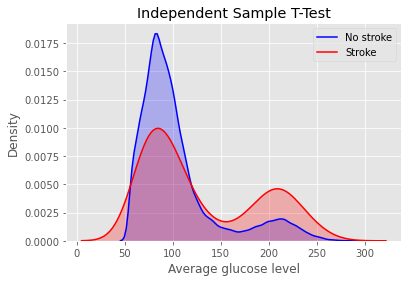

In [89]:
sns.kdeplot(Good['avg_glucose_level'], shade=True,color='blue',label='No stroke')
sns.kdeplot(Bad['avg_glucose_level'], shade=True,color='red',label='Stroke')
plt.title("Independent Sample T-Test")
plt.xlabel('Average glucose level')
plt.ylabel('Density')

In [90]:
Good=Good.drop(Good[Good['avg_glucose_level'].isnull()].index)
Bad=Bad.drop(Bad[Bad['avg_glucose_level'].isnull()].index)
a=Good['avg_glucose_level']
b=Bad['avg_glucose_level']

In [91]:
#from scipy import stats
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))#print the P-Value and the T-Statistic

P-Value:2.9795802745219772e-30 T-Statistic:-11.918384809768217


In [92]:
stats.levene(a, b)

LeveneResult(statistic=282.7339731053291, pvalue=3.0224597361655913e-63)

In [93]:
#import researchpy as rp
rp.summary_cont(data['avg_glucose_level_log'].groupby(data['stroke_cat']))

,N,Mean,SD,SE,95% Conf.,Interval
stroke_cat,,,,,,
No,42617,4.5788,0.3444,0.0017,4.5755,4.5820
Yes,783,4.7619,0.4490,0.0160,4.7304,4.7934


Text(0, 0.5, 'Density')

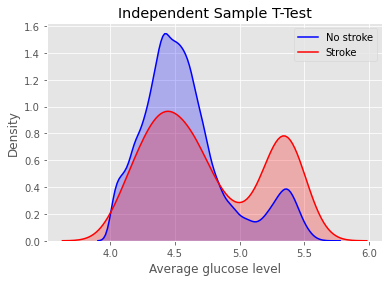

In [94]:
# avg_glucose_level_log
sns.kdeplot(Good['avg_glucose_level_log'], shade=True,color='blue',label='No stroke')
sns.kdeplot(Bad['avg_glucose_level_log'], shade=True,color='red',label='Stroke')
plt.title("Independent Sample T-Test")
plt.xlabel('Average glucose level')
plt.ylabel('Density')

In [95]:
Good=Good.drop(Good[Good['avg_glucose_level_log'].isnull()].index)
Bad=Bad.drop(Bad[Bad['avg_glucose_level_log'].isnull()].index)
a=Good['avg_glucose_level_log']
b=Bad['avg_glucose_level_log']

In [96]:
#from scipy import stats
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) # running independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) # printing the P-Value and the T-Statistic

P-Value:8.607587114131863e-28 T-Statistic:-11.351471996394142


In [97]:
stats.levene(a, b)

LeveneResult(statistic=223.6912047884137, pvalue=1.8929446043876057e-50)

Avg_glucose_level_log does not have the better results of T-Test than avg_glucose_level, although the former has the better skewness and kurtosis.
Levene's test is less sensitive to abnormality for equality of variances.

## Bivariate analysis
### Numeric vs numeric (Pearson (Linear) or Spearman/Kendall (Rank) Correlation Coefficient)

In [98]:
import scipy.stats

In [99]:
# Linear Regression
# SciPy Correlation Calculation
print(scipy.stats.pearsonr(data['age'],data['avg_glucose_level']))
print(scipy.stats.pearsonr(data['age'],data['avg_glucose_level_log']))

(0.23624895550360644, 0.0)
(0.21075452499849812, 0.0)


In [100]:
# Linear Regression
# NumPy Correlation Calculation
xy = np.array([data['age'],data['avg_glucose_level']])
scipy.stats.linregress(xy)

LinregressResult(slope=0.4506410259060211, intercept=85.45053608729185, rvalue=0.2362489555036047, pvalue=0.0, stderr=0.00744384574531401)

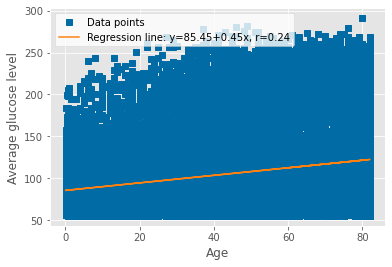

In [101]:
# Visualization of Correlation
x = data['age']
y = data['avg_glucose_level']

#plt.style.use('tableau-colorblind10')
#plt.style.use('ggplot')
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('Age')
ax.set_ylabel('Average glucose level')
ax.legend(facecolor='white')
plt.show()

In [102]:
# Spearman Correlation Coefficient
print(scipy.stats.spearmanr(data['age'],data['avg_glucose_level']))
print(scipy.stats.spearmanr(data['age'],data['avg_glucose_level_log']))
print(data['age'].corr(data['avg_glucose_level'], method='spearman'))

SpearmanrResult(correlation=0.1517025052507088, pvalue=0.0)
SpearmanrResult(correlation=0.1517025052507088, pvalue=0.0)
0.1517025052507088


In [103]:
# Kendall Correlation Coefficient
print(scipy.stats.kendalltau(data['age'],data['avg_glucose_level']))
print(scipy.stats.kendalltau(data['age'],data['avg_glucose_level_log']))
print(data['age'].corr(data['avg_glucose_level'], method='kendall'))

KendalltauResult(correlation=0.1017481094212566, pvalue=0.0)
KendalltauResult(correlation=0.1017481094212566, pvalue=0.0)
0.1017481094212566


## Fixing missing values

In [104]:
#data.isna().sum()
data.apply(lambda x : sum(x.isnull()))

Residence_type               0
age                          0
avg_glucose_level            0
bmi                       2053
ever_married                 0
gender                       0
heart_disease                0
hypertension                 0
smoking_status           19043
source                       0
stroke                   18601
work_type                    0
stroke_cat               18601
heart_disease_cat            0
hypertension_cat             0
avg_glucose_level_log        0
dtype: int64

In [105]:
# Calculating number of missing values for each column and it's percentage
def pct_of_miss():
  data1=data[data.columns[data.isnull().sum()>=1]]
  total_miss = data1.isnull().sum().sort_values(ascending=False)
  percent_miss = (data1.isnull().sum()/data1.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'PercentAge'])
  return(missing_data)
pct_of_miss()

,Number of Missing,PercentAge
smoking_status,19043,0.3071
stroke_cat,18601,0.3000
stroke,18601,0.3000
bmi,2053,0.0331


In [106]:
table = data.pivot_table(values='bmi', index='age', aggfunc=np.median)
print(table)

            bmi
age            
0.0800  14.3000
0.1600  15.0000
0.2400  15.9500
0.3200  16.9000
0.4000  17.2000
...         ...
78.0000 27.9000
79.0000 27.2000
80.0000 27.1000
81.0000 27.3500
82.0000 26.9000

[104 rows x 1 columns]


In [107]:
bmi_avg_Age = data.pivot_table(values='bmi', index='age', aggfunc=np.median)
# Getting a Boolean variable specifying missing values
miss_bool = data['bmi'].isnull() 
# Checking number of missing values before and after imputation
print ('Orignal #missing: %d'% sum(miss_bool) )
data.loc[miss_bool,'bmi']  = data.loc[miss_bool,'age'].apply(lambda x: bmi_avg_Age.at[x,'bmi'])
print ('Final #missing: %d'% sum(data['bmi'].isnull()) )

Orignal #missing: 2053
Final #missing: 0


In [108]:
# Importing mode
from scipy.stats import mode
print('Mode:\n')
print(mode(data['smoking_status']))
print('\nMode().mode[0]:\n')
print(mode(data['smoking_status']).mode[0])

Mode:

ModeResult(mode=array(['never smoked'], dtype=object), count=array([22886]))

Mode().mode[0]:

never smoked


In [109]:
pd.crosstab(index=[data.hypertension,data.heart_disease], columns=data.smoking_status, margins=True)

smoking_status              formerly smoked  never smoked  smokes    All
hypertension heart_disease                                              
0            0                         8573         19763    7849  36185
             1                          708           605     439   1752
1            0                         1245          2261     864   4370
             1                          227           257     167    651
All                                   10753         22886    9319  42958

In [110]:
data['smoking_status'].fillna('unkown', inplace=True)

In [111]:
pd.crosstab(index=[data.hypertension,data.heart_disease], columns=data.smoking_status, margins=True)

smoking_status              formerly smoked  never smoked  smokes  unkown  \
hypertension heart_disease                                                  
0            0                         8573         19763    7849   17820   
             1                          708           605     439     450   
1            0                         1245          2261     864     670   
             1                          227           257     167     103   
All                                   10753         22886    9319   19043   

smoking_status                All  
hypertension heart_disease         
0            0              54005  
             1               2202  
1            0               5040  
             1                754  
All                         62001

In [112]:
def PctConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(index=[data.hypertension,data.heart_disease], columns=data.smoking_status, margins=True).apply(PctConvert, axis=1)

smoking_status              formerly smoked  never smoked  smokes  unkown  \
hypertension heart_disease                                                  
0            0                       0.1587        0.3659  0.1453  0.3300   
             1                       0.3215        0.2748  0.1994  0.2044   
1            0                       0.2470        0.4486  0.1714  0.1329   
             1                       0.3011        0.3408  0.2215  0.1366   
All                                  0.1734        0.3691  0.1503  0.3071   

smoking_status                All  
hypertension heart_disease         
0            0             1.0000  
             1             1.0000  
1            0             1.0000  
             1             1.0000  
All                        1.0000

In [113]:
data.isna().sum()

Residence_type               0
age                          0
avg_glucose_level            0
bmi                          0
ever_married                 0
gender                       0
heart_disease                0
hypertension                 0
smoking_status               0
source                       0
stroke                   18601
work_type                    0
stroke_cat               18601
heart_disease_cat            0
hypertension_cat             0
avg_glucose_level_log        0
dtype: int64

### Smoking_status distribution after treatment of misssing values

In [114]:
data['smoking_status'].value_counts()

never smoked       22886
unkown             19043
formerly smoked    10753
smokes              9319
Name: smoking_status, dtype: int64

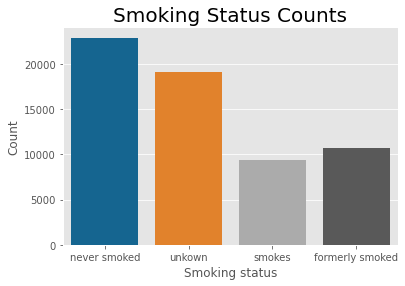

In [115]:
# Countplot

#plt.style.use('ggplot')
sns.countplot(data['smoking_status'])
plt.title("Smoking Status Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Smoking status')
plt.ylabel('Count')
plt.show()
#plt.style.use('tableau-colorblind10')

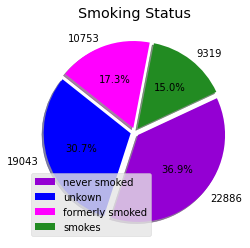

In [116]:
# Pie chart

stroke_cat = data['smoking_status'].value_counts()
values = stroke_cat.values
colors = ['Darkviolet', 'b', 'magenta', 'Forestgreen']
labels = stroke_cat.index
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=25, counterclock=False, shadow=True)
plt.title('Smoking Status')
plt.legend(labels, loc=3)

plt.show()

### Smoking_status vs stroke after treatment of misssing values

In [117]:
pd.crosstab(data['smoking_status'],data['stroke_cat'],margins = True)

stroke_cat,No,Yes,All
smoking_status,,,
formerly smoked,7272,221,7493
never smoked,15769,284,16053
smokes,6429,133,6562
unkown,13147,145,13292
All,42617,783,43400


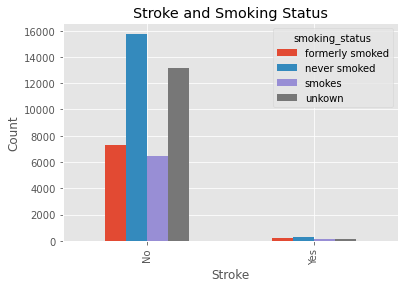

In [118]:
plt.style.use('ggplot')
pd.crosstab(data['stroke_cat'],data['smoking_status']).plot(kind='bar')
plt.title('Stroke and Smoking Status')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()
plt.style.use('tableau-colorblind10')

In [119]:
# Chi-square test
from scipy.stats import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data['stroke_cat'],data['smoking_status'],margins = False))

print(exp_val)
print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

if p_val < 0.05: # considering significant level 5%
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

[[ 7357.81523041 15763.38020737  6443.61184332 13052.19271889]
 [  135.18476959   289.61979263   118.38815668   239.80728111]]

Chi-square is : 95.594472 

p_value is : 0.000000 

degree of freedom is : 3

There is some correlation between the two variables at significance level 0.05


### Smoking_status vs age after treatment of misssing values

In [120]:
#import researchpy as rp
rp.summary_cont(data['age'].groupby(data['smoking_status']))

,N,Mean,SD,SE,95% Conf.,Interval
smoking_status,,,,,,
formerly smoked,10753,54.2922,18.0905,0.1745,53.9502,54.6342
never smoked,22886,45.5125,19.2776,0.1274,45.2627,45.7622
smokes,9319,46.4041,16.3341,0.1692,46.0724,46.7358
unkown,19043,29.2342,24.8409,0.1800,28.8814,29.5871


Text(0, 0.5, 'Age')

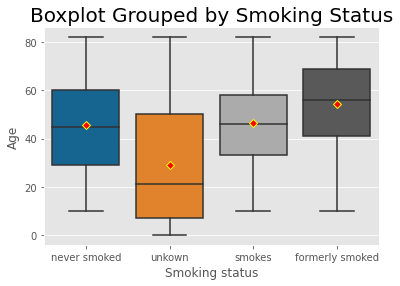

In [121]:
# Boxplot
#plt.style.use('ggplot')
ax = sns.boxplot(x='smoking_status', y='age', data=data, showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot Grouped by Smoking Status", y=1, fontdict={"fontsize": 20})
plt.xlabel('Smoking status')
plt.ylabel('Age')
#plt.style.use('tableau-colorblind10')

#### ANOVA test

In [122]:
#pip install researchpy

In [123]:
dfa=data.drop(data[data['age'].isnull()].index)

In [124]:
import scipy.stats as stats

stats.f_oneway(dfa['age'][dfa['smoking_status'] == 'never smoked'],
               dfa['age'][dfa['smoking_status'] == 'unkown'],
               dfa['age'][dfa['smoking_status'] == 'formerly smoked'],
               dfa['age'][dfa['smoking_status'] == 'smokes'])

F_onewayResult(statistic=4083.9198033217863, pvalue=0.0)

Before the results should be interpreted, the assumptions of the test should be checked.

In [125]:
# Levene's test checks if the different groups have equal variances
stats.levene(dfa['age'][dfa['smoking_status'] == 'never smoked'],
               dfa['age'][dfa['smoking_status'] == 'unkown'],
               dfa['age'][dfa['smoking_status'] == 'formerly smoked'],
               dfa['age'][dfa['smoking_status'] == 'smokes'])

LeveneResult(statistic=1214.715532995575, pvalue=0.0)

## Fixing outliers

https://www.mayoclinic.org/diseases-conditions/hypoglycemia/symptoms-causes/syc-20373685
https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20blood%20sugar%20level%20less,mmol%2FL)%20indicates%20prediabetes
https://www.mayoclinic.org/diseases-conditions/diabetic-ketoacidosis/symptoms-causes/syc-20371551
    fasting blood sugar 70 mg/dL (3.9 mmol/L) or lower - hypoglycemia
    fasting blood sugar less than 100 mg/dL (5.6 mmol/L) - normal 
    fasting blood sugar 100-125 mg/dL (5.6-6.9 mmol/L) - prediabetes
    fasting blood sugar 126 mg/dL (7 mmol/L) or higher - diabetes 
    consistently higher than 300 mg/dL (16.7mmol/L) - diabetic ketoacidosis
    
- min 55 mg/dL (3.1 mmol/L)
- max 291.05 mg/dL (16.2 mmol/L)

https://www.cdc.gov/obesity/adult/defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range
BMI	Category
Lower than 18.5	Underweight
18.5 to <25	Healthy weight
25 to <30	Overweight
30 to <35	Class 1 Obesity
35 to <40	Class 2 Obesity
40 or higher	Class 3 Obesity

- max 97.6 (outlier)

In [126]:
# Lower outer fence: Q1 - 3*IQR
# Upper outer fence: Q3 + 3*IQR
def outlier_analysis(col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+3*(IQR)
    LOF=Q1-3*(IQR)
    data_out =data[(data[col]<LOF) | (data[col]>UOF)] # Creating a data set that only includes extreme outliers
    sns.distplot(data_out[col]) # Plotting univariate distributions with a histogram by default and fitting a kernel density estimate (KDE)
    
    pct_outlier = data_out[col].count() /data[col].count() *100
    print('The percentAge of the outliers in the column (%): \n', np.round(pct_outlier, decimals=3))
    return data_out[col].describe()

The percentAge of the outliers in the column (%): 
 0.195


count   121.0000
mean     66.5810
std       7.6907
min      60.3000
25%      61.7000
50%      64.2000
75%      68.4000
max      97.6000
Name: bmi, dtype: float64

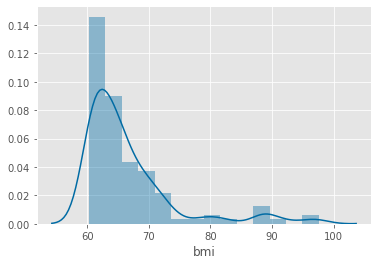

In [127]:
outlier_analysis('bmi')

In [128]:
# Lower outer fence: Q1 - 3*IQR
# Upper outer fence: Q3 + 3*IQR
def outlier_drop(col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+3*(IQR)
    LOF=Q1-3*(IQR)
    data_noutl =data[(data[col]>=LOF) & (data[col]<=UOF)] # Creating a new data set that has just exclude extreme outliers
    
    return data_noutl

In [129]:
data_noutl = outlier_drop('bmi')
data_noutl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61880 entries, 1 to 72943
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Residence_type         61880 non-null  object 
 1   age                    61880 non-null  float64
 2   avg_glucose_level      61880 non-null  float64
 3   bmi                    61880 non-null  float64
 4   ever_married           61880 non-null  object 
 5   gender                 61880 non-null  object 
 6   heart_disease          61880 non-null  int64  
 7   hypertension           61880 non-null  int64  
 8   smoking_status         61880 non-null  object 
 9   source                 61880 non-null  object 
 10  stroke                 43318 non-null  float64
 11  work_type              61880 non-null  object 
 12  stroke_cat             43318 non-null  object 
 13  heart_disease_cat      61880 non-null  object 
 14  hypertension_cat       61880 non-null  object 
 15  av

In [130]:
print('The number of rows removed with outliers:',len(data.index)-len(data_noutl.index))
print('The percentage of rows removed (%):',(len(data.index)-len(data_noutl.index))/len(data.index)*100)

The number of rows removed with outliers: 121
The percentage of rows removed (%): 0.19515814261060307


In [131]:
data_noutl['bmi'].describe()

count   61880.0000
mean       28.5153
std         7.4675
min        10.1000
25%        23.4000
50%        27.9000
75%        32.6000
max        60.2000
Name: bmi, dtype: float64

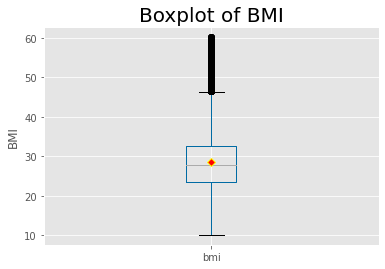

In [132]:
data_noutl.boxplot(column='bmi', showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot of BMI", y=1, fontdict={"fontsize": 20})
plt.xlabel('')
plt.ylabel('BMI')
plt.show()

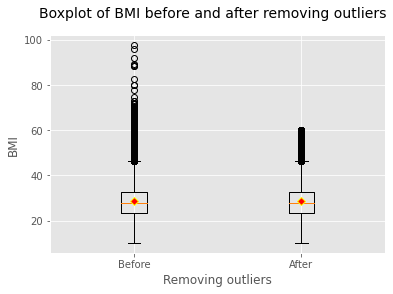

In [133]:
#plt.boxplot([data.bmi, data_noutl.bmi],showmeans=True)

fig = plt.figure()
fig.suptitle('Boxplot of BMI before and after removing outliers', fontsize=14)

ax = fig.add_subplot(111)
ax.boxplot([data.bmi, data_noutl.bmi], showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})

ax.set_xlabel('Removing outliers')
ax.set_ylabel('BMI')
ax.set_xticklabels(['Before', 'After'])

plt.show()

### Stroke vs BMI

In [134]:
#import researchpy as rp
rp.summary_cont(data_noutl['bmi'].groupby(data_noutl['stroke_cat']))

,N,Mean,SD,SE,95% Conf.,Interval
stroke_cat,,,,,,
No,42535,28.5100,7.4954,0.0363,28.4388,28.5812
Yes,783,29.7383,5.7907,0.2069,29.3320,30.1445


Text(0, 0.5, 'BMI')

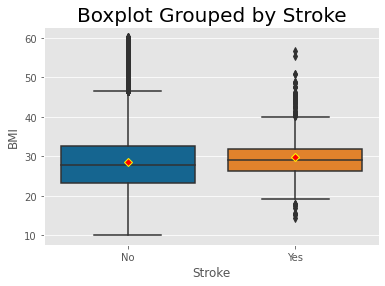

In [135]:
# Boxplot
ax = sns.boxplot(x='stroke_cat', y='bmi', data=data_noutl, showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot Grouped by Stroke", y=1, fontdict={"fontsize": 20})
plt.xlabel('Stroke')
plt.ylabel('BMI')

#### T-test

In [136]:
Good=data_noutl[(data_noutl['stroke']==0)]
Bad=data_noutl[(data_noutl['stroke']==1)]
Good.shape, Bad.shape

((42535, 16), (783, 16))

Text(0, 0.5, 'Density')

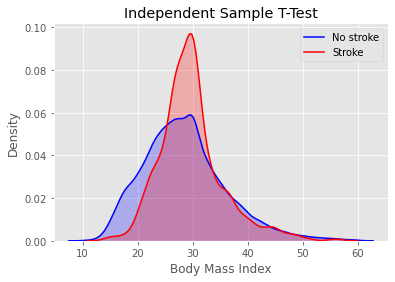

In [137]:
sns.kdeplot(Good['bmi'], shade=True,color='blue',label='No stroke')
sns.kdeplot(Bad['bmi'], shade=True,color='red',label='Stroke')
plt.title("Independent Sample T-Test")
plt.xlabel('Body Mass Index')
plt.ylabel('Density')

In [138]:
Good=Good.drop(Good[Good['bmi'].isnull()].index)
Bad=Bad.drop(Bad[Bad['bmi'].isnull()].index)
a=Good['bmi']
b=Bad['bmi']

In [139]:
#from scipy import stats
tStat, pValue = stats.ttest_ind(a, b, equal_var = False) # running independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) # printing the P-Value and the T-Statistic

P-Value:7.24053274309201e-09 T-Statistic:-5.845781674295752


In [140]:
stats.levene(a, b)

LeveneResult(statistic=89.94585921372246, pvalue=2.5671545315781012e-21)

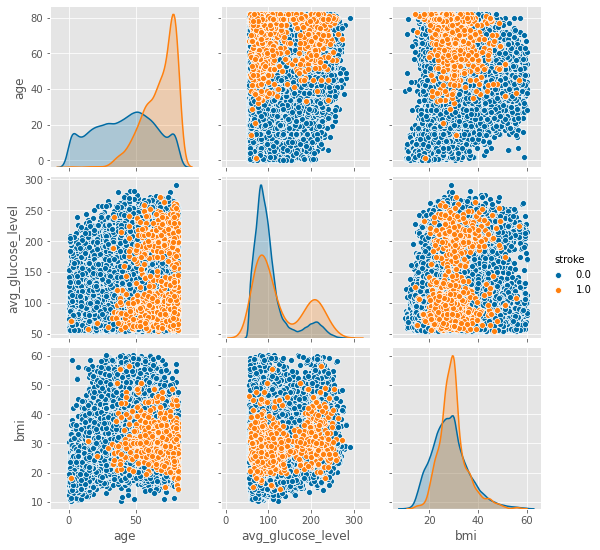

In [141]:
sns.pairplot(data_noutl,
             x_vars=['age','avg_glucose_level','bmi'],
             y_vars=['age','avg_glucose_level','bmi'],
             hue="stroke")

In [142]:
print(scipy.stats.pearsonr(data['age'],data['bmi']))
print(scipy.stats.pearsonr(data_noutl['age'],data_noutl['bmi']))

(0.3609341368698603, 0.0)
(0.36999083333933314, 0.0)


In [143]:
print(scipy.stats.spearmanr(data['age'],data['bmi']))
print(scipy.stats.spearmanr(data_noutl['age'],data_noutl['bmi']))

SpearmanrResult(correlation=0.39407005325609923, pvalue=0.0)
SpearmanrResult(correlation=0.3952568563047686, pvalue=0.0)


In [144]:
print(scipy.stats.kendalltau(data['age'],data['bmi']))
print(scipy.stats.kendalltau(data_noutl['age'],data_noutl['bmi']))

KendalltauResult(correlation=0.26978889038563425, pvalue=0.0)
KendalltauResult(correlation=0.27071130296038226, pvalue=0.0)


## Feature engineering

1.Find and Replace

2.Encoding (mapping or one hot encoding)
 
3.Create new columns or PCA (Principal Component Analysis)

4.Scaling with StandardScaler in this project 

### Binning

In [145]:
def binning(col, cut_points, labels=None):
  minval = col.min()  
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  
  return colBin

In [146]:
cut_points_BS = [70,140,200]
cut_points_BMI = [18.5,25,30]
labels = ["Low","Medium","High","Very High"]

print("\navg_glucose_level_bin:")
data_noutl["avg_glucose_level_bin"] = binning(data_noutl["avg_glucose_level"], cut_points_BS, labels)
print (pd.value_counts(data_noutl["avg_glucose_level_bin"], sort=False))

print("\nbmi_bin:")
data_noutl["bmi_bin"] = binning(data_noutl["bmi"], cut_points_BMI, labels)
print (pd.value_counts(data_noutl["bmi_bin"], sort=False))


avg_glucose_level_bin:
Low           8749
Medium       44282
High          4392
Very High     4457
Name: avg_glucose_level_bin, dtype: int64

bmi_bin:
Low           4840
Medium       16031
High         17914
Very High    23095
Name: bmi_bin, dtype: int64


### Avg_glucose_level_bin vs age

In [147]:
#import researchpy as rp
rp.summary_cont(data_noutl['age'].groupby(data_noutl['avg_glucose_level_bin']))

,N,Mean,SD,SE,95% Conf.,Interval
avg_glucose_level_bin,,,,,,
Low,8749,40.1713,22.3487,0.2389,39.7029,40.6397
Medium,44282,39.9475,22.3159,0.1060,39.7396,40.1554
High,4392,50.0422,21.3180,0.3217,49.4115,50.6728
Very High,4457,60.3607,15.0298,0.2251,59.9193,60.8021


Text(0, 0.5, 'Age')

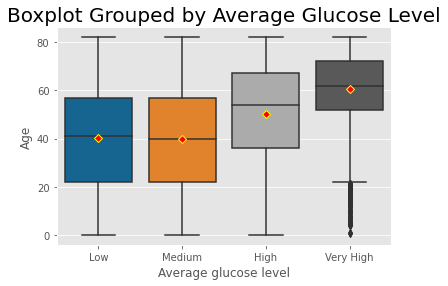

In [148]:
# Boxplot
ax = sns.boxplot(x='avg_glucose_level_bin', y='age', data=data_noutl, showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot Grouped by Average Glucose Level", y=1, fontdict={"fontsize": 20})
plt.xlabel('Average glucose level')
plt.ylabel('Age')

#### ANOVA test

In [149]:
#pip install researchpy

In [150]:
dfa=data_noutl.drop(data_noutl[data_noutl['age'].isnull()].index)

In [151]:
import scipy.stats as stats

stats.f_oneway(dfa['age'][dfa['avg_glucose_level_bin'] == 'Low'],
               dfa['age'][dfa['avg_glucose_level_bin'] == 'Medium'],
               dfa['age'][dfa['avg_glucose_level_bin'] == 'High'],
               dfa['age'][dfa['avg_glucose_level_bin'] == 'Very High'])

F_onewayResult(statistic=1402.4534136000868, pvalue=0.0)

Before the results should be interpreted, the assumptions of the test should be checked. 

In [152]:
stats.levene(dfa['age'][dfa['avg_glucose_level_bin'] == 'Low'],
               dfa['age'][dfa['avg_glucose_level_bin'] == 'Medium'],
               dfa['age'][dfa['avg_glucose_level_bin'] == 'High'],
               dfa['age'][dfa['avg_glucose_level_bin'] == 'Very High'])

LeveneResult(statistic=500.750725805646, pvalue=1.487e-321)

### BMI_bin vs age

In [153]:
#import researchpy as rp
rp.summary_cont(data_noutl['age'].groupby(data_noutl['bmi_bin']))

,N,Mean,SD,SE,95% Conf.,Interval
bmi_bin,,,,,,
Low,4840,10.1091,15.5665,0.2238,9.6705,10.5478
Medium,16031,34.6667,23.3664,0.1845,34.3049,35.0284
High,17914,48.3580,19.9231,0.1489,48.0662,48.6497
Very High,23095,49.2865,16.9767,0.1117,49.0676,49.5055


Text(0, 0.5, 'Age')

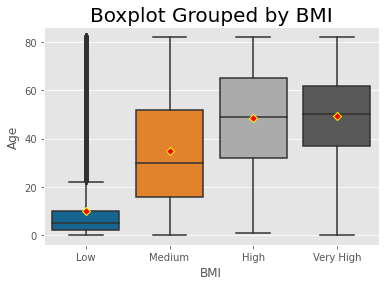

In [154]:
# Boxplot
ax = sns.boxplot(x='bmi_bin', y='age', data=data_noutl, showmeans=True,
            meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"yellow"})
plt.title("Boxplot Grouped by BMI", y=1, fontdict={"fontsize": 20})
plt.xlabel('BMI')
plt.ylabel('Age')

#### ANOVA test

In [155]:
#pip install researchpy

In [156]:
dfa=data_noutl.drop(data_noutl[data_noutl['age'].isnull()].index)

In [157]:
import scipy.stats as stats

stats.f_oneway(dfa['age'][dfa['bmi_bin'] == 'Low'],
               dfa['age'][dfa['bmi_bin'] == 'Medium'],
               dfa['age'][dfa['bmi_bin'] == 'High'],
               dfa['age'][dfa['bmi_bin'] == 'Very High'])

F_onewayResult(statistic=6732.520620696404, pvalue=0.0)

In [158]:
stats.levene(dfa['age'][dfa['bmi_bin'] == 'Low'],
               dfa['age'][dfa['bmi_bin'] == 'Medium'],
               dfa['age'][dfa['bmi_bin'] == 'High'],
               dfa['age'][dfa['bmi_bin'] == 'Very High'])

LeveneResult(statistic=1667.3992273971985, pvalue=0.0)

### Encoding - mapping

In [159]:
data_noutl['avg_glucose_level_bin'].value_counts()

Medium       44282
Low           8749
Very High     4457
High          4392
Name: avg_glucose_level_bin, dtype: int64

In [160]:
data_noutl['avg_glucose_level_map'] = data_noutl['avg_glucose_level_bin'].map({
    'Low':0,
    'Medium':1,
    'High':2,
    'Very High':3
})

In [161]:
data_noutl['avg_glucose_level_map'].value_counts()

1    44282
0     8749
3     4457
2     4392
Name: avg_glucose_level_map, dtype: int64

In [162]:
data_noutl['bmi_bin'].value_counts()

Very High    23095
High         17914
Medium       16031
Low           4840
Name: bmi_bin, dtype: int64

In [163]:
data_noutl['bmi_map'] = data_noutl['bmi_bin'].map({
    'Low':0,
    'Medium':1,
    'High':2,
    'Very High':3
})

In [164]:
data_noutl['bmi_map'].value_counts()

3    23095
2    17914
1    16031
0     4840
Name: bmi_map, dtype: int64

### Encoding - One Hot Encoding

In [165]:
data_noutl.dtypes

Residence_type             object
age                       float64
avg_glucose_level         float64
bmi                       float64
ever_married               object
gender                     object
heart_disease               int64
hypertension                int64
smoking_status             object
source                     object
stroke                    float64
work_type                  object
stroke_cat                 object
heart_disease_cat          object
hypertension_cat           object
avg_glucose_level_log     float64
avg_glucose_level_bin    category
bmi_bin                  category
avg_glucose_level_map    category
bmi_map                  category
dtype: object

In [166]:
# Categrocial variables
data_noutl_cat=data_noutl.select_dtypes(include='object')
data_noutl_cat.columns

Index(['Residence_type', 'ever_married', 'gender', 'smoking_status', 'source',
       'work_type', 'stroke_cat', 'heart_disease_cat', 'hypertension_cat'],
      dtype='object')

In [167]:
data_noutl_dum = pd.get_dummies(data_noutl, columns=['Residence_type', 'ever_married', 'gender', 'smoking_status',
       'work_type'], drop_first=True)

In [168]:
data_noutl_dum.head()

,age,avg_glucose_level,bmi,heart_disease,hypertension,source,stroke,stroke_cat,heart_disease_cat,hypertension_cat,...,ever_married_Yes,gender_Male,gender_Other,smoking_status_never smoked,smoking_status_smokes,smoking_status_unkown,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
id,,,,,,,,,,,,,,,,,,,,,
1,80.0000,67.4500,25.6000,1,0,train,0.0000,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
2,55.0000,105.1100,27.8000,0,0,test,nan,NaN,No,No,...,1,0,0,0,0,1,0,1,0,0
3,27.0000,84.9100,27.5000,0,0,test,nan,NaN,No,No,...,1,1,0,1,0,0,0,1,0,0
4,37.0000,82.1500,24.3000,0,0,train,0.0000,No,No,No,...,1,0,0,0,1,0,0,1,0,0
5,78.0000,99.2600,22.6000,1,1,test,nan,NaN,Yes,Yes,...,1,1,0,0,1,0,0,0,1,0


### Correlatin matrix (Heatmap)

In [169]:
# Correlatin matrix (Heatmap)
import seaborn as sns

In [170]:
data_noutl_dum.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,avg_glucose_level,bmi,heart_disease,hypertension,stroke,avg_glucose_level_log,Residence_type_Urban,ever_married_Yes,gender_Male,gender_Other,smoking_status_never smoked,smoking_status_smokes,smoking_status_unkown,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
age,1.00,0.24,0.37,0.25,0.27,0.16,0.21,-0.00,0.69,-0.03,-0.01,0.11,0.08,-0.38,-0.07,0.14,0.33,-0.64
avg_glucose_level,0.24,1.00,0.19,0.14,0.16,0.08,0.98,0.00,0.15,0.04,-0.01,0.01,0.03,-0.10,-0.01,0.01,0.08,-0.11
bmi,0.37,0.19,1.00,0.06,0.16,0.02,0.17,-0.00,0.35,-0.02,-0.00,0.12,0.07,-0.29,-0.02,0.21,0.09,-0.47
heart_disease,0.25,0.14,0.06,1.00,0.12,0.11,0.13,-0.00,0.13,0.08,-0.00,-0.04,0.03,-0.06,-0.01,-0.01,0.10,-0.09
hypertension,0.27,0.16,0.16,0.12,1.00,0.08,0.14,0.00,0.18,0.02,-0.00,0.04,0.02,-0.12,-0.02,0.01,0.10,-0.13
stroke,0.16,0.08,0.02,0.11,0.08,1.00,0.07,0.00,0.07,0.01,-0.00,-0.00,0.01,-0.04,-0.01,-0.00,0.06,-0.05
avg_glucose_level_log,0.21,0.98,0.17,0.13,0.14,0.07,1.00,0.00,0.14,0.03,-0.01,0.01,0.02,-0.08,-0.01,0.01,0.07,-0.10
Residence_type_Urban,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00,-0.00,0.00
ever_married_Yes,0.69,0.15,0.35,0.13,0.18,0.07,0.14,-0.00,1.00,-0.03,-0.01,0.10,0.11,-0.33,-0.08,0.16,0.20,-0.55
gender_Male,-0.03,0.04,-0.02,0.08,0.02,0.01,0.03,-0.00,-0.03,1.00,-0.01,-0.10,0.03,0.05,-0.00,-0.05,-0.00,0.09


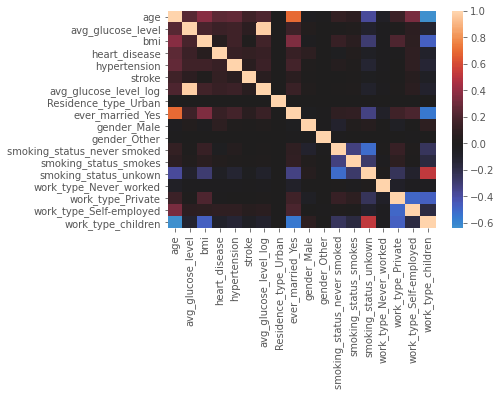

In [171]:
ht = sns.heatmap(data_noutl_dum.corr(),center=0)

# Modelling

## Sampling & splitting

In [172]:
data_noutl_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61880 entries, 1 to 72943
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          61880 non-null  float64 
 1   avg_glucose_level            61880 non-null  float64 
 2   bmi                          61880 non-null  float64 
 3   heart_disease                61880 non-null  int64   
 4   hypertension                 61880 non-null  int64   
 5   source                       61880 non-null  object  
 6   stroke                       43318 non-null  float64 
 7   stroke_cat                   43318 non-null  object  
 8   heart_disease_cat            61880 non-null  object  
 9   hypertension_cat             61880 non-null  object  
 10  avg_glucose_level_log        61880 non-null  float64 
 11  avg_glucose_level_bin        61880 non-null  category
 12  bmi_bin                      61880 non-null  category
 13  a

In [173]:
data_noutl_dum.columns

Index(['age', 'avg_glucose_level', 'bmi', 'heart_disease', 'hypertension',
       'source', 'stroke', 'stroke_cat', 'heart_disease_cat',
       'hypertension_cat', 'avg_glucose_level_log', 'avg_glucose_level_bin',
       'bmi_bin', 'avg_glucose_level_map', 'bmi_map', 'Residence_type_Urban',
       'ever_married_Yes', 'gender_Male', 'gender_Other',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'smoking_status_unkown', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children'],
      dtype='object')

In [174]:
data_num_only = data_noutl_dum.drop(['stroke_cat', 'avg_glucose_level_log',
       'heart_disease_cat', 'hypertension_cat', 'avg_glucose_level_bin',
       'bmi_bin', 'avg_glucose_level_map', 'bmi_map'], axis=1)
data_num_only.dtypes

age                            float64
avg_glucose_level              float64
bmi                            float64
heart_disease                    int64
hypertension                     int64
source                          object
stroke                         float64
Residence_type_Urban             uint8
ever_married_Yes                 uint8
gender_Male                      uint8
gender_Other                     uint8
smoking_status_never smoked      uint8
smoking_status_smokes            uint8
smoking_status_unkown            uint8
work_type_Never_worked           uint8
work_type_Private                uint8
work_type_Self-employed          uint8
work_type_children               uint8
dtype: object

In [175]:
data_num_only['stroke'].value_counts(dropna=False)

0.0000    42535
nan       18562
1.0000      783
Name: stroke, dtype: int64

In [176]:
def set_weight(row):
    if row['stroke'] == 1:
        row['Weight'] = 1
    else:
        row['Weight'] = 0.02
    return row


In [177]:
df_with_weights = data_num_only.apply(set_weight, axis = 1)
df_with_weights.head()

,age,avg_glucose_level,bmi,heart_disease,hypertension,source,stroke,Residence_type_Urban,ever_married_Yes,gender_Male,gender_Other,smoking_status_never smoked,smoking_status_smokes,smoking_status_unkown,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Weight
id,,,,,,,,,,,,,,,,,,,
1,80.0000,67.4500,25.6000,1,0,train,0.0000,1,1,0,0,1,0,0,0,0,1,0,0.0200
2,55.0000,105.1100,27.8000,0,0,test,nan,1,1,0,0,0,0,1,0,1,0,0,0.0200
3,27.0000,84.9100,27.5000,0,0,test,nan,1,1,1,0,1,0,0,0,1,0,0,0.0200
4,37.0000,82.1500,24.3000,0,0,train,0.0000,0,1,0,0,0,1,0,0,1,0,0,0.0200
5,78.0000,99.2600,22.6000,1,1,test,nan,0,1,1,0,0,1,0,0,0,1,0,0.0200


In [178]:
data_sample = df_with_weights.sample(n=3000, weights='Weight', random_state=100)

In [179]:
data_sample['stroke'].value_counts(dropna=False)

0.0000    1665
1.0000     674
nan        661
Name: stroke, dtype: int64

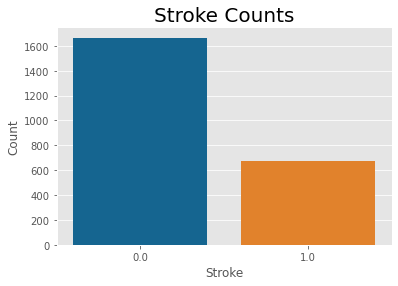

In [180]:
# Countplot
sns.countplot(data_sample['stroke'])
plt.title("Stroke Counts", y=1, fontdict={"fontsize": 20})
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

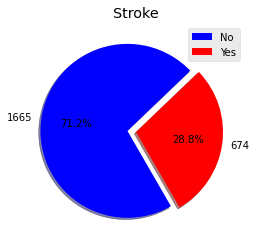

In [181]:
# Pie chart

stroke_cat = data_sample['stroke'].value_counts()
values = stroke_cat.values
#values = [stroke_cat[0],stroke_cat[1]]
colors = ['b', 'red']
#labels = stroke_cat.index
labels = ['No','Yes']
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values, autopct='%1.1f%%', explode=explode,
        startangle=300, counterclock=False, shadow=True)
plt.title('Stroke')
plt.legend(labels, loc='best')

plt.show()

In [182]:
data_split = data_sample.drop(['Weight'], axis=1)
data_split.shape

(3000, 18)

In [183]:
test=data_split[(data_split['source']=='test')]
train=data_split[(data_split['source']=='train')]
train.shape, test.shape

((2339, 18), (661, 18))

In [184]:
# Splitting data set
from sklearn.model_selection import train_test_split
dftrain, dftest = train_test_split(train, test_size=0.2, random_state=0) # dftest is for evaluating the selected model at the end of project before predicting for test data set
dftrain.shape , dftest.shape

((1871, 18), (468, 18))

In [185]:
dftest['source']='Eval'
train= pd.concat([dftrain,dftest],ignore_index=False, sort=True)
data_concat= pd.concat([train,test],ignore_index=False, sort=True)
train.shape, test.shape, data_concat.shape

((2339, 18), (661, 18), (3000, 18))

In [186]:
data_concat['source'].value_counts()

train    1871
test      661
Eval      468
Name: source, dtype: int64

In [187]:
X_train = dftrain.drop(['stroke','source'], axis=1)
y_train = dftrain['stroke']
X_test = dftest.drop(['stroke','source'], axis=1)
y_test = dftest['stroke']

In [188]:
dftest['stroke'].value_counts()

0.0000    339
1.0000    129
Name: stroke, dtype: int64

## Modelling

### Logistic Regression

In [189]:
#1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [190]:
# Scaling for the classification dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [191]:
grid_parameters = {
    'tol':[0.01,0.1,1],
    'random_state':[0,1],
    'solver':['lbfgs','sag'],
    'max_iter':[100,1000]
    }
grid = GridSearchCV(LogisticRegression(),grid_parameters,cv=4)

In [192]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000], 'random_state': [0, 1],
                         'solver': ['lbfgs', 'sag'], 'tol': [0.01, 0.1, 1]})

In [193]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'max_iter': 100, 'random_state': 0, 'solver': 'sag', 'tol': 0.1}
LogisticRegression(random_state=0, solver='sag', tol=0.1)
0.8033009846446678


In [194]:
# Finding the k-fold cross-validation score
from sklearn.model_selection import cross_val_score
k_fold = cross_val_score(grid.best_estimator_,X_train_scaled,y_train,cv=4,scoring='accuracy').mean()
k_fold

0.8033009846446678

In [195]:
model = grid.best_estimator_
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=0, solver='sag', tol=0.1)

In [196]:
# Training score - accuracy
training_score = model.score(X_train_scaled,y_train)
training_score

0.8011758417958311

In [197]:
# Testing score - accuracy
testing_score = model.score(X_test_scaled,y_test)
testing_score

0.782051282051282

In [198]:
y_pred = model.predict(X_test_scaled)

In [199]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.782051282051282

In [200]:
# Confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Confusion matrix :
 [[285  54]
 [ 48  81]]

Classification report :
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       339
         1.0       0.60      0.63      0.61       129

    accuracy                           0.78       468
   macro avg       0.73      0.73      0.73       468
weighted avg       0.79      0.78      0.78       468



Logistic Regression

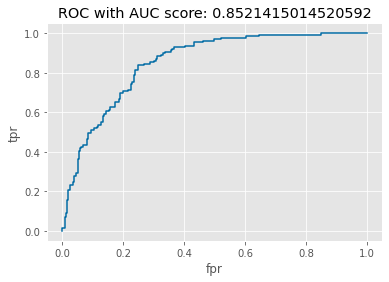

In [201]:
# Finding roc_auc_score in binary classification

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC with AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

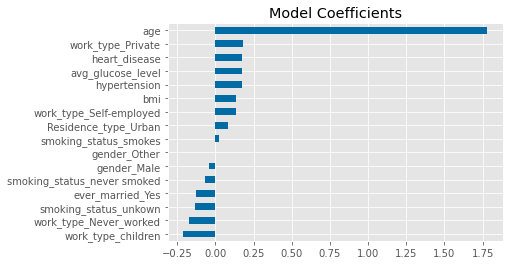

In [202]:
# Model Coefficients
coef1 = pd.Series(model.coef_[0], X_train.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Model Coefficients')

### Decision Tree

In [203]:
#2 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [204]:
params_dictionary = {
                        'criterion': ['gini','entropy'],
                        'splitter': ['best','random'],
                        'random_state' : [1, 10, 100],
                        'max_depth' : [3, 5, 7]
                     }
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params_dictionary,cv=4)

In [205]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'random_state': [1, 10, 100],
                         'splitter': ['best', 'random']})

In [206]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'random_state': 100, 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100,
                       splitter='random')
0.798492148465382


In [207]:
# Finding the k-fold cross-validation score
from sklearn.model_selection import cross_val_score
k_fold = cross_val_score(grid.best_estimator_,X_train,y_train,cv=4,scoring='accuracy').mean()
k_fold

0.798492148465382

[Text(152.10865384615386, 199.32, 'X[0] <= 43.052\nentropy = 0.87\nsamples = 1871\nvalue = [1326, 545]'),
 Text(72.4326923076923, 163.07999999999998, 'X[2] <= 36.708\nentropy = 0.214\nsamples = 678\nvalue = [655, 23]'),
 Text(35.41153846153846, 126.83999999999999, 'X[0] <= 20.572\nentropy = 0.156\nsamples = 616\nvalue = [602, 14]'),
 Text(19.315384615384616, 90.6, 'X[0] <= 7.303\nentropy = 0.034\nsamples = 282\nvalue = [281, 1]'),
 Text(12.876923076923077, 54.359999999999985, 'X[7] <= 0.605\nentropy = 0.071\nsamples = 117\nvalue = [116, 1]'),
 Text(6.438461538461539, 18.119999999999976, 'entropy = 0.144\nsamples = 49\nvalue = [48, 1]'),
 Text(19.315384615384616, 18.119999999999976, 'entropy = 0.0\nsamples = 68\nvalue = [68, 0]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 165\nvalue = [165, 0]'),
 Text(51.50769230769231, 90.6, 'X[7] <= 0.228\nentropy = 0.237\nsamples = 334\nvalue = [321, 13]'),
 Text(38.63076923076923, 54.359999999999985, 'X[14] <= 0.986\ne

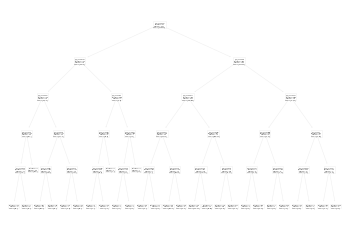

In [208]:
model = grid.best_estimator_
model.fit(X_train,y_train)
from sklearn import tree
tree.plot_tree(model)

In [209]:
# Training score - accuracy
training_score = model.score(X_train,y_train)
training_score

0.7862105825761625

In [210]:
# Testing score - accuracy
testing_score = model.score(X_test,y_test)
testing_score

0.7799145299145299

In [211]:
y_pred = model.predict(X_test)

In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7799145299145299

In [213]:
# Confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Confusion matrix :
 [[305  34]
 [ 69  60]]

Classification report :
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       339
         1.0       0.64      0.47      0.54       129

    accuracy                           0.78       468
   macro avg       0.73      0.68      0.70       468
weighted avg       0.77      0.78      0.77       468



Decision Tree

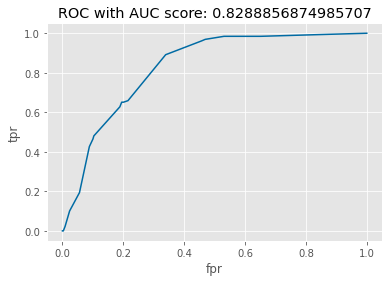

In [214]:
# Finding roc_auc_score in binary classification

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC with AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

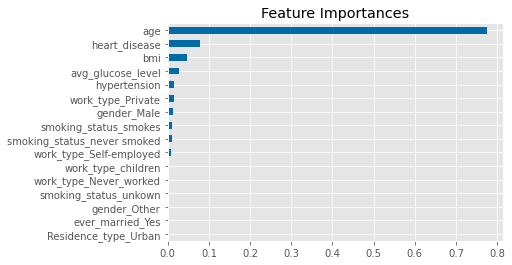

In [215]:
# Feature Importance
coef1 = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Feature Importances')

### KNN (K-nearest neighbors)

In [216]:
#3 KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [217]:
params_dictionary = {
                        'n_neighbors' : [3, 5, 10],
                        'weights': ['uniform','distance'],
                        'p' : [1, 2, 3],
                        'n_jobs' : [1, -1]
                     }
grid = GridSearchCV(KNeighborsClassifier(),param_grid=params_dictionary,cv=4)

In [218]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [1, -1], 'n_neighbors': [3, 5, 10],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [219]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'n_jobs': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_jobs=1, n_neighbors=10, p=1, weights='distance')
0.7835360273797105


In [220]:
# Finding the k-fold cross-validation score
from sklearn.model_selection import cross_val_score
k_fold = cross_val_score(grid.best_estimator_,X_train,y_train,cv=4,scoring='accuracy').mean()
k_fold

0.7835360273797105

In [221]:
model = grid.best_estimator_
model.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=10, p=1, weights='distance')

In [222]:
# Training score - accuracy
training_score = model.score(X_train,y_train)
training_score

1.0

In [223]:
# Testing score - accuracy
testing_score = model.score(X_test,y_test)
testing_score

0.7692307692307693

In [224]:
y_pred = model.predict(X_test)

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7692307692307693

In [226]:
# Confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Confusion matrix :
 [[281  58]
 [ 50  79]]

Classification report :
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       339
         1.0       0.58      0.61      0.59       129

    accuracy                           0.77       468
   macro avg       0.71      0.72      0.72       468
weighted avg       0.77      0.77      0.77       468



KNN

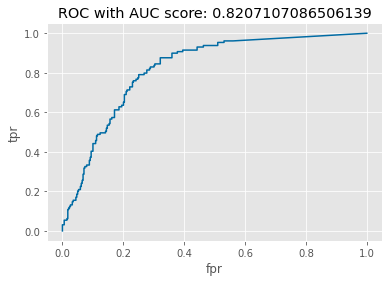

In [227]:
# Finding roc_auc_score in binary classification

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC with AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

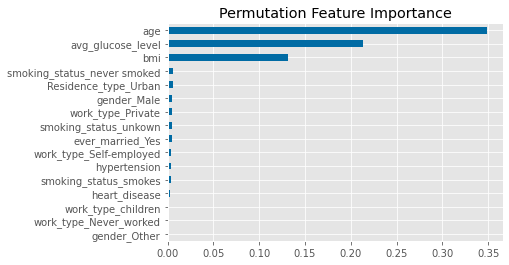

In [228]:
# Feature importance is not for KNN
# Permutation Feature Importance
# It is used to calculate the relative importance score regardless of the model used.
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X_train, y_train, scoring='accuracy')
importance = results.importances_mean
pd.Series(importance, X_train.columns)

coef1 = pd.Series(importance, X_train.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Permutation Feature Importance')

### SVM (Support Vector Machine)

In [229]:
#4 SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [230]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree': [2,3],
                    }
grid = GridSearchCV(SVC(),param_grid=params_dictionary,cv=4)

In [231]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [232]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}
SVC(C=0.1, degree=2, kernel='linear')
0.803837460422043


In [233]:
# Finding the k-fold cross-validation score
from sklearn.model_selection import cross_val_score
k_fold = cross_val_score(grid.best_estimator_,X_train,y_train,cv=4,scoring='accuracy').mean()
k_fold

0.803837460422043

In [234]:
model = grid.best_estimator_
model.fit(X_train,y_train)

SVC(C=0.1, degree=2, kernel='linear')

In [235]:
# Training score - accuracy
training_score = model.score(X_train,y_train)
training_score

0.8081239978621059

In [236]:
# Testing score - accuracy
testing_score = model.score(X_test,y_test)
testing_score

0.7841880341880342

In [237]:
y_pred = model.predict(X_test)

In [238]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7841880341880342

In [239]:
# Confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[283  56]
 [ 45  84]]

Classification report :
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.85       339
         1.0       0.60      0.65      0.62       129

    accuracy                           0.78       468
   macro avg       0.73      0.74      0.74       468
weighted avg       0.79      0.78      0.79       468



SVC

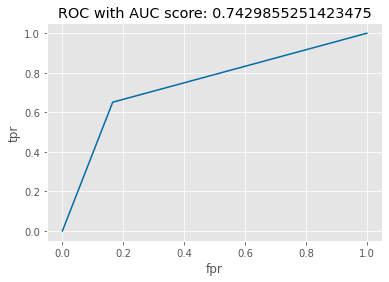

In [240]:
# Finding roc_auc_score in binary classification

from sklearn.metrics import roc_auc_score, roc_curve
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC with AUC score: {}'.format(roc_auc_score(y_test,y_pred)))
plt.show()

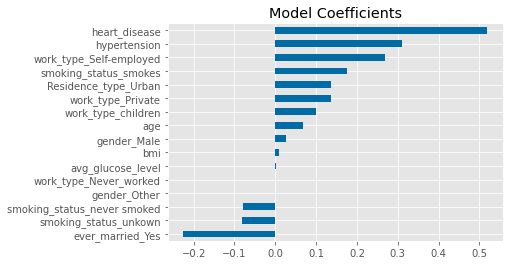

In [241]:
# Model Coefficients
coef1 = pd.Series(model.coef_[0], X_train.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Model Coefficients')

### Random Forest

In [242]:
#5 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [243]:
params_dictionary = {
    'random_state':[0,1],
    'max_depth':[1,5,10],
    'n_estimators':[20,40,60,80,100]}
grid = GridSearchCV(RandomForestClassifier(),param_grid=params_dictionary,cv=4)

In [244]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [0, 1]})

In [245]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'max_depth': 5, 'n_estimators': 40, 'random_state': 0}
RandomForestClassifier(max_depth=5, n_estimators=40, random_state=0)
0.8059730686872015


In [246]:
# Finding the k-fold cross-validation score
from sklearn.model_selection import cross_val_score
k_fold = cross_val_score(grid.best_estimator_,X_train,y_train,cv=4,scoring='accuracy').mean()
k_fold

0.8059730686872015

In [247]:
model = grid.best_estimator_
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=40, random_state=0)

In [248]:
# Training score - accuracy
training_score = model.score(X_train,y_train)
training_score

0.8252271512560129

In [249]:
# Testing score - accuracy
testing_score = model.score(X_test,y_test)
testing_score

0.7799145299145299

In [250]:
y_pred = model.predict(X_test)

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7799145299145299

In [252]:
# Confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[288  51]
 [ 52  77]]

Classification report :
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       339
         1.0       0.60      0.60      0.60       129

    accuracy                           0.78       468
   macro avg       0.72      0.72      0.72       468
weighted avg       0.78      0.78      0.78       468



Random Forest

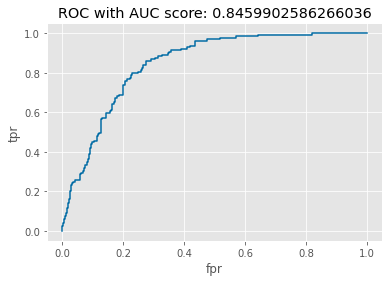

In [253]:
# Finding roc_auc_score in binary classification

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC with AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

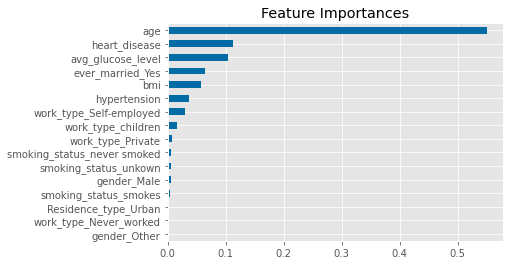

In [254]:
# Feature Importance
coef1 = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Feature Importances')

### AdaBoost

In [255]:
#6 AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [256]:
params_dictionary = {
    'random_state':[0,1],
    'base_estimator':[
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=5),
        DecisionTreeClassifier(max_depth=10)
    ],
    'n_estimators':[20,40,60,80,100]}
grid = GridSearchCV(AdaBoostClassifier(),param_grid=params_dictionary,cv=4)

In [257]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=10)],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [0, 1]})

In [258]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'base_estimator': DecisionTreeClassifier(max_depth=1), 'n_estimators': 80, 'random_state': 0}
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=80, random_state=0)
0.7829904006295869


In [259]:
# Finding the k-fold cross-validation score
from sklearn.model_selection import cross_val_score
k_fold = cross_val_score(grid.best_estimator_,X_train,y_train,cv=4,scoring='accuracy').mean()
k_fold

0.7829904006295869

In [260]:
model = grid.best_estimator_
model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=80, random_state=0)

In [261]:
# Training score - accuracy
training_score = model.score(X_train,y_train)
training_score

0.806520577231427

In [262]:
# Testing score - accuracy
testing_score = model.score(X_test,y_test)
testing_score

0.7927350427350427

In [263]:
y_pred = model.predict(X_test)

In [264]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7927350427350427

In [265]:
# Confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[293  46]
 [ 51  78]]

Classification report :
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       339
         1.0       0.63      0.60      0.62       129

    accuracy                           0.79       468
   macro avg       0.74      0.73      0.74       468
weighted avg       0.79      0.79      0.79       468



AdaBoost

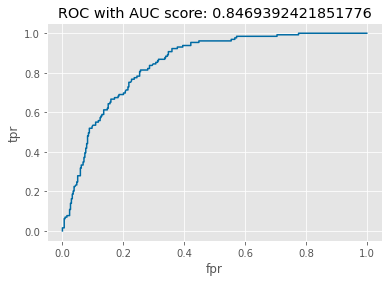

In [266]:
# Finding roc_auc_score in binary classification

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC with AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

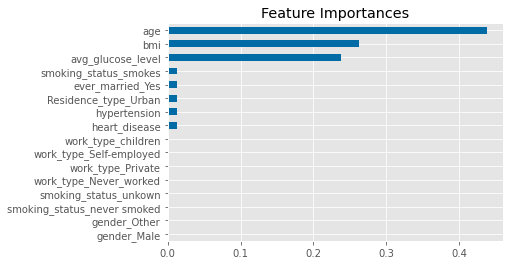

In [267]:
# Feature Importance
coef1 = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=True)
coef1.plot(kind='barh', title='Feature Importances')

END